# Import Libraries and Stock Data

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [2]:
start_date = '2021-07-12'
end_date = datetime.today().strftime('%Y-%m-%d')

In [3]:
# TGT is the ticker for Target
ticker='TGT'

In [4]:
# The article was released on a Thursday so I'm starting the anlaysis the following Monday
stock_data = yf.download(tickers=ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data = pd.DataFrame(stock_data)

## EDA  of Stock Data

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-12,249.500000,252.470001,249.119995,252.240005,234.282120,3056900
2021-07-13,250.500000,253.440002,250.500000,251.750000,233.826981,2392900
2021-07-14,252.600006,254.050003,251.610001,253.630005,235.573166,2578700
2021-07-15,253.699997,254.529999,252.029999,252.929993,234.923004,2646200
2021-07-16,253.899994,254.050003,250.860001,251.149994,233.269653,3415900


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 765 entries, 2021-07-12 to 2024-07-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       765 non-null    float64
 1   High       765 non-null    float64
 2   Low        765 non-null    float64
 3   Close      765 non-null    float64
 4   Adj Close  765 non-null    float64
 5   Volume     765 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.8 KB


In [8]:
price_cols = data.select_dtypes(include=['float64']).columns

In [9]:
data[price_cols] = data[price_cols].map(lambda x: round(x, 2))

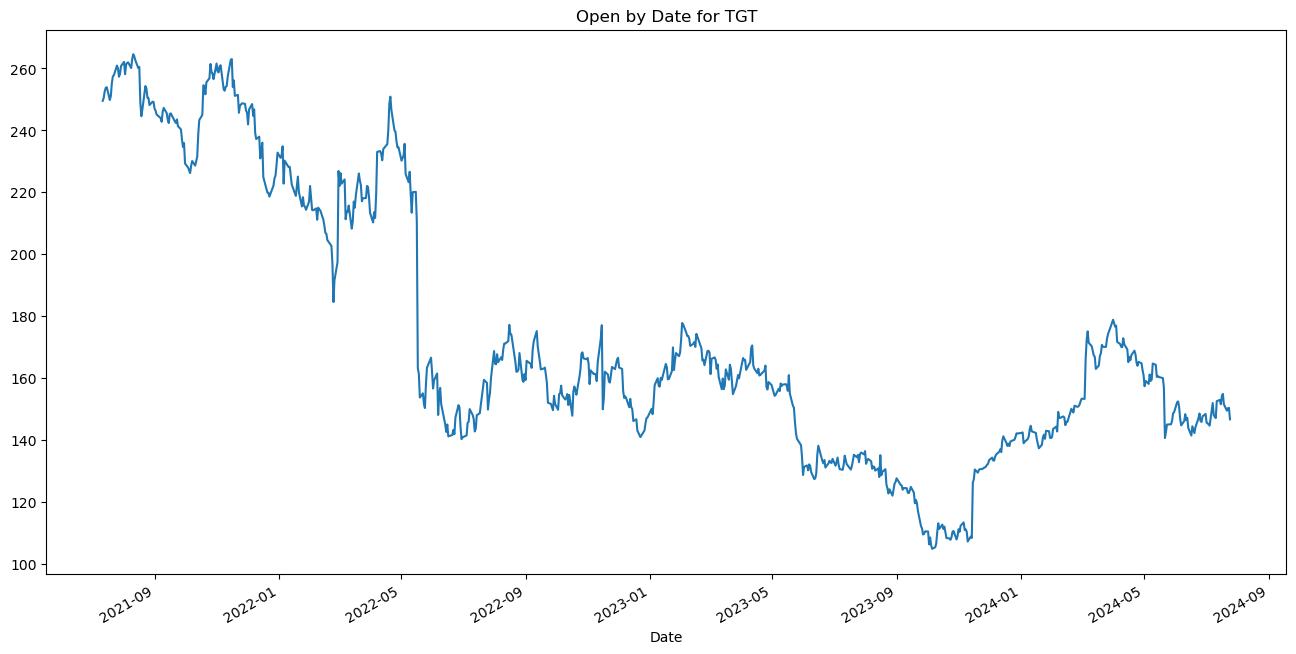

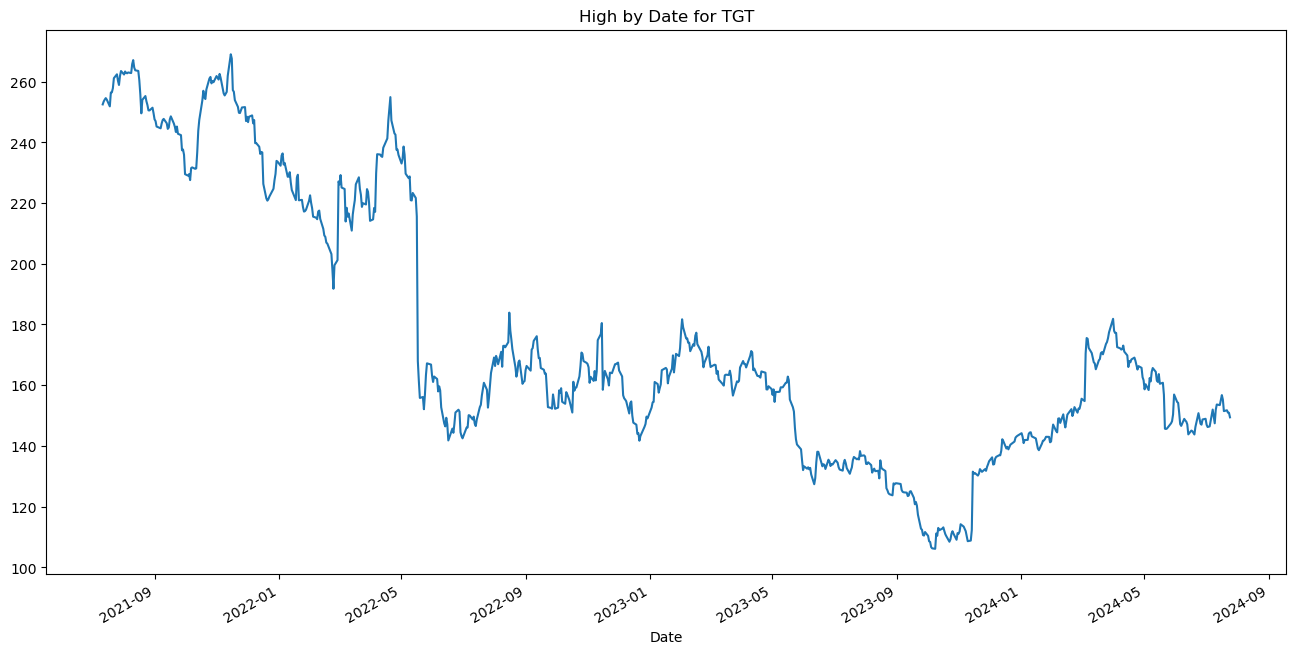

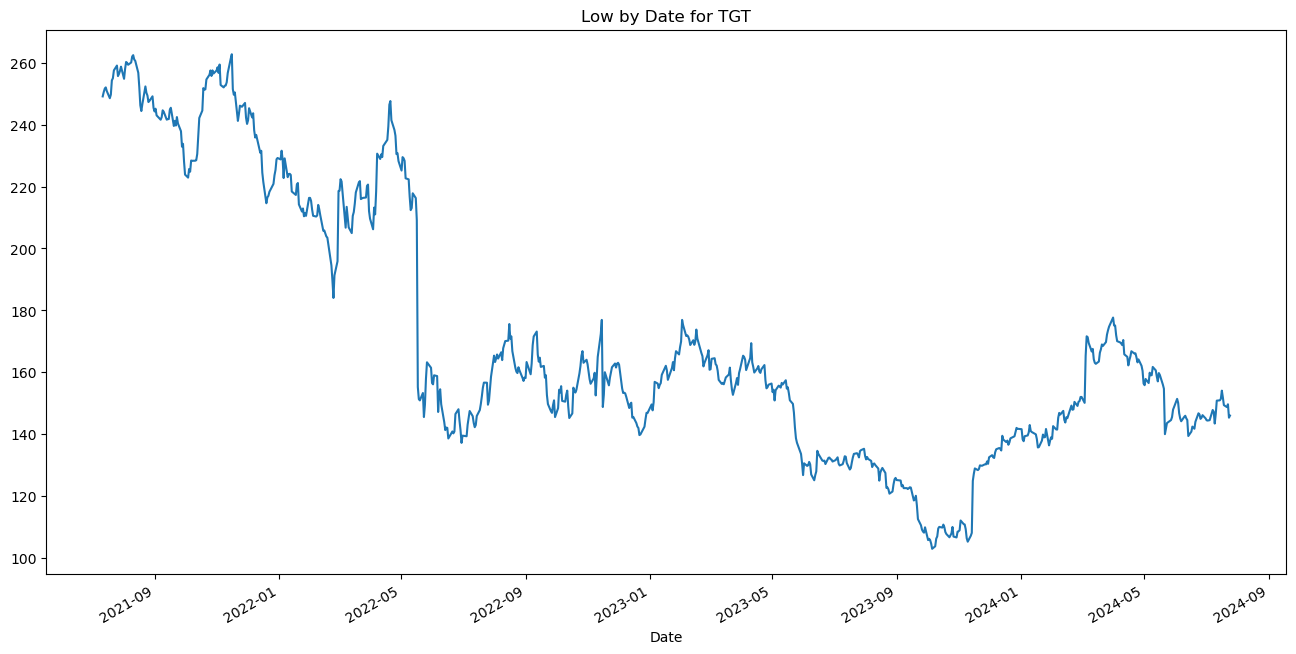

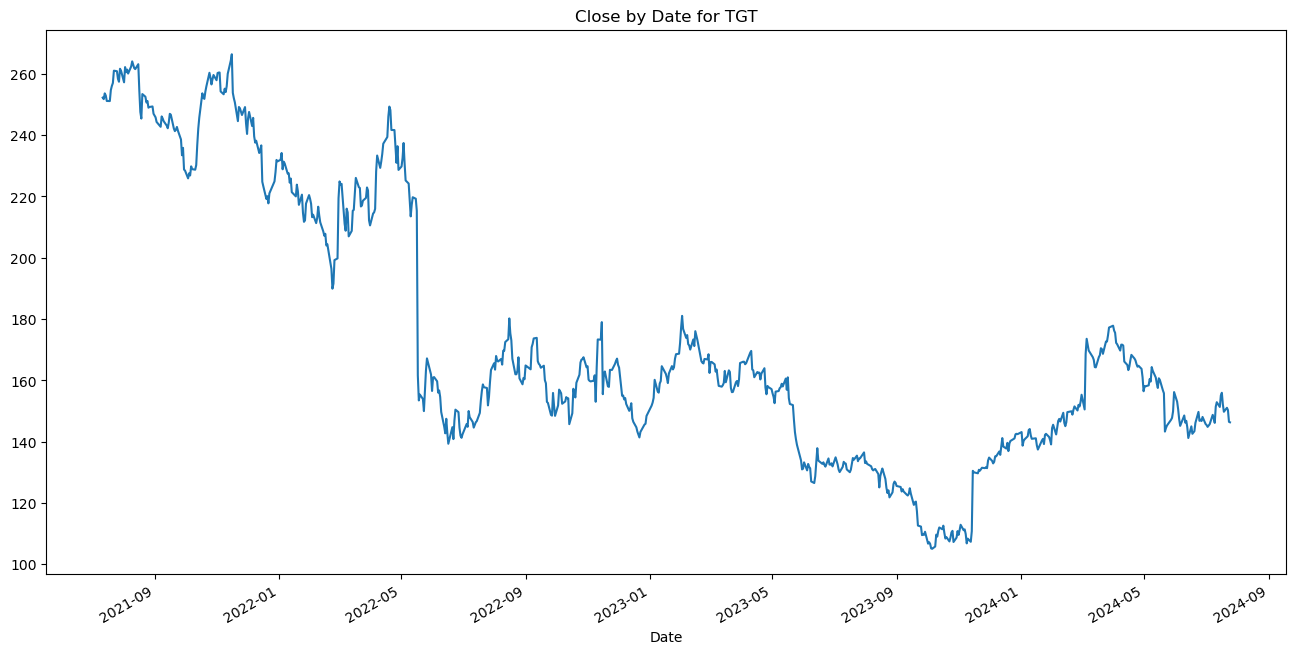

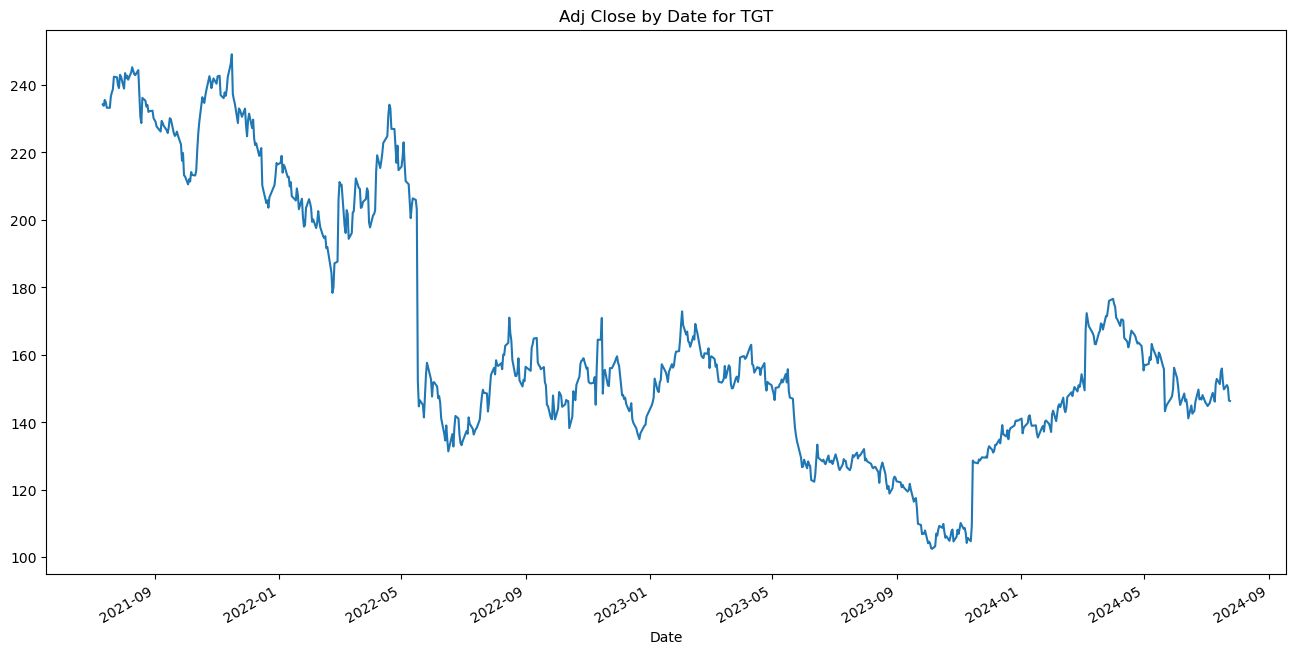

In [10]:
for col in price_cols:
    
    plt.figure(figsize=(16,8))
    plt.title(f"{col} by Date for {ticker}")

    data[col].plot();

In [13]:
moving_averages = 30, 60, 90

for i in moving_averages:
    data[f'{i} day MA'] = data['Close'].rolling(i).mean().round(2)

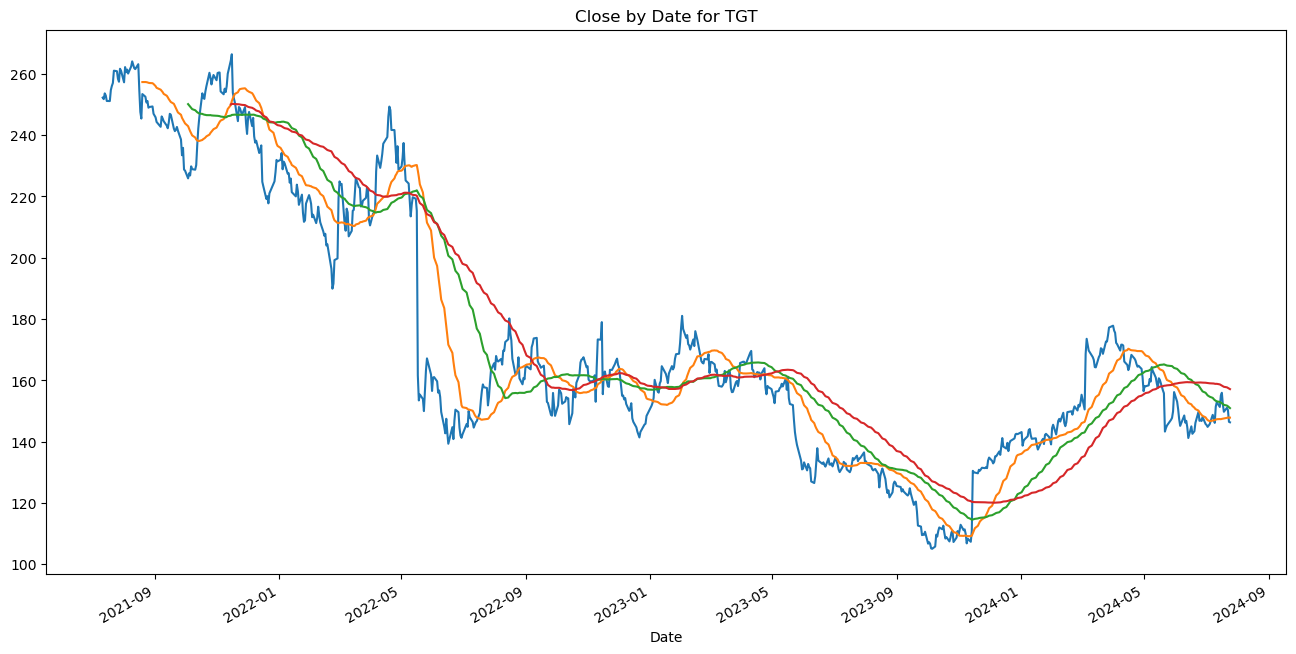

In [14]:
plt.figure(figsize=(16,8))
plt.title(f"Close by Date for {ticker}")

ax = data['Close'].plot()
ax1 = data['30 day MA'].plot()
ax2 = data['60 day MA'].plot()
ax3 = data['90 day MA'].plot()